# Statistical plotting with Seaborn (regression plots, distribution plots)


# Importing Libraries

In [115]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels

# Importing Data

In [69]:
data = pd.read_csv('Heart.csv')

# Exploring Dataset

## Data Columns

In [70]:
data.columns 

Index(['Id', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG',
       'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

## Dataset Datatypes

In [71]:
data.dtypes

Id             int64
Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

## Checking For Null Values

In [72]:
data.isnull().sum()

Id           0
Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

# Visualization

## 1. Linear Regression Plot

#### What is the Regression Plot ?

This plot shows the relationship between two variables. The line of best fit (regression line) is calculated to represent the best possible prediction of the target variable (y) based on the independent variable (x).

### Parameters

- x : Input variable(s) for the regression line.

- y : Target variable(s).

- data : DataFrame containing the input and target variables.

- ci : Confidence interval for the regression line. If set to None, no confidence interval is drawn.

- x_estimator : Function to estimate the central tendency of the values in each group.

- truncate : If True, the regression line is truncated to the data limits.

- order : Order of polynomial regression to use. If 0, then a linear regression is performed.

- color : Color of the regression line.

- marker : Marker style for the scatter plot data points.

- line_kws : Change the line style



## Simple Regression Plot

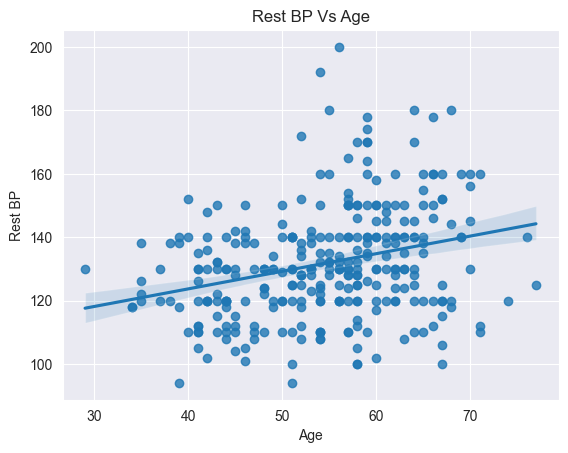

In [76]:
sns.set_style('darkgrid')
plot = sns.regplot(data , x = 'Age',y = 'RestBP')
plot.set(xlabel = 'Age',ylabel = 'Rest BP', title= "Rest BP Vs Age")
plt.show()


### Interpretation

The plot shows a simple linear regression line between Age and Resting Blood Pressure. The line indicates that as the age increases, the resting blood pressure also increases, with a slight positive slope.

## Customized Regression Plot

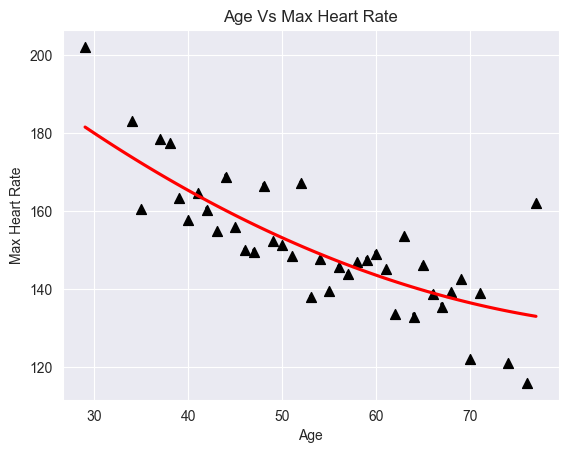

In [81]:
regplot=sns.regplot(x = 'Age', y = 'MaxHR',data=data,x_estimator=np.mean,ci=0.95 ,order= 2,truncate=True,line_kws=dict(color='red'),marker="^",color='black')
regplot.set(xlabel = "Age" , ylabel = "Max Heart Rate",title = "Age Vs Max Heart Rate")
plt.show()

### Interpretation

The plot shows a confidence interval of 95% around the regression line. This means that, on average, 95% of the data points fall within this interval. The regression line indicates that as the glucose test value increases, the glucose fasting value also increases, with a slight positive slope.



## 2. Multiple Linear Regression Plot

#### What is Multi Linear Regression ?

This plot shows the relationship between multiple independent variables (x) and a target variable (y). The line of best fit (regression line) is calculated to represent the best possible prediction of the target variable (y) based on the independent variables (x).

### Parameters

- x : Input variable(s) for the regression line.

- y : Target variable(s).

- data : DataFrame containing the input and target variables.

- ci : Confidence interval for the regression line. If set to None, no confidence interval is drawn.

- x_estimator : Function to estimate the central tendency of the values in each group.

- truncate : If True, the regression line is truncated to the data limits.

- order : Order of polynomial regression to use. If 0, then a linear regression is performed.

- color : Color of the regression line.

- marker : Marker style for the scatter plot data points.

- line_kws : Change the line style

- pallete : Change the color of the Plots

### Simple Multiple Linear Regression

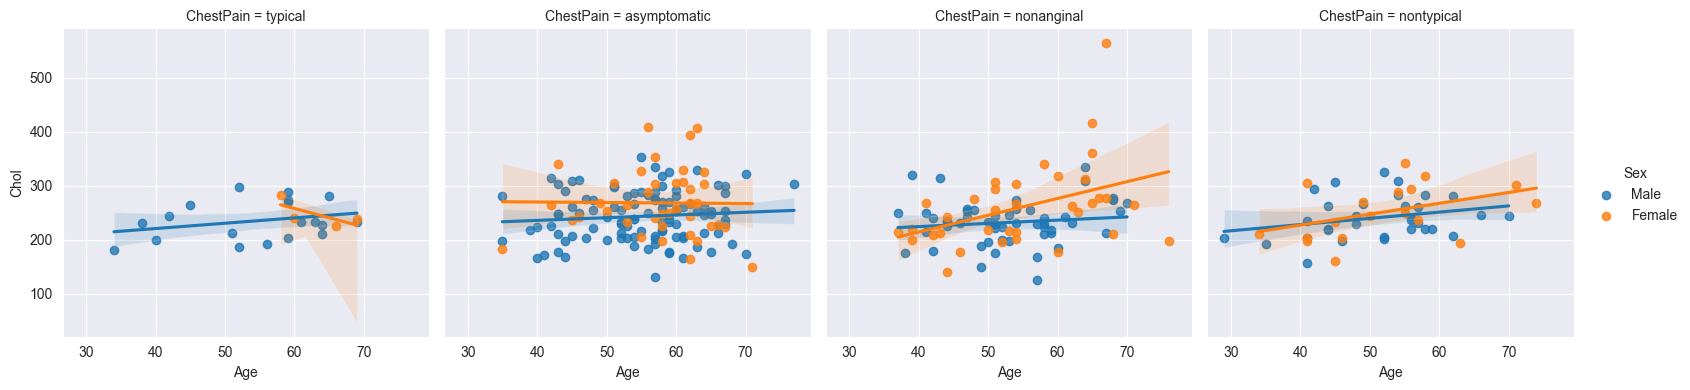

In [97]:
dataCopy = data.copy()
dataCopy['Sex'] = data['Sex'].replace({0:'Female',1:"Male"})
sns.lmplot(data=dataCopy , x = 'Age', y = 'Chol' , hue ='Sex',col = 'ChestPain' , height=4 ,)
plt.show()




### Interpretation 

The plot shows a multiple linear regression line for each chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic) with respect to age and cholesterol levels. The regression lines indicate that, on average, for each chest pain type, as the age increases, the cholesterol levels also increase. Additionally, the regression lines are separated by gender 

### Customized Multiple Linear Regression

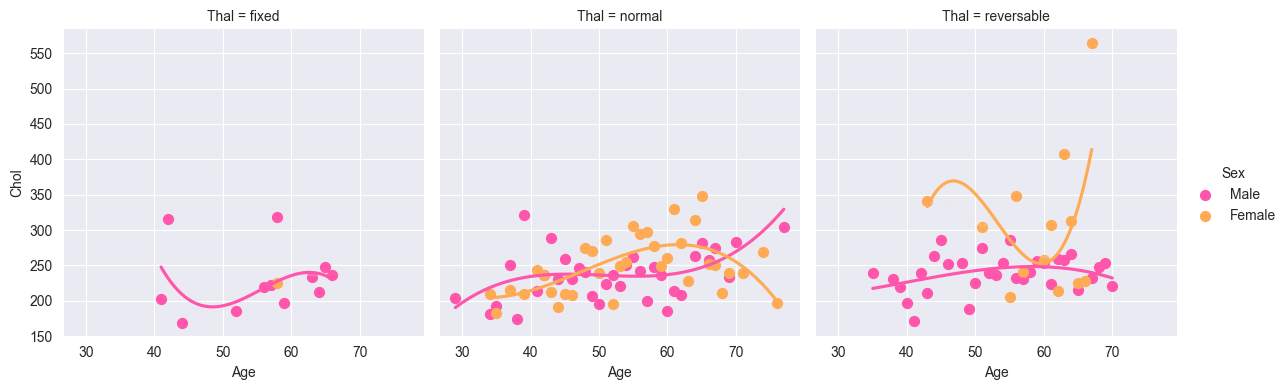

In [101]:
dataCopy = data.copy()
dataCopy['Sex'] = data['Sex'].replace({0:'Female',1:"Male"})

sns.lmplot(data=dataCopy , x = 'Age', y = 'Chol' , hue ='Sex',col = 'Thal' , height=4 ,order= 3 , x_estimator=np.mean, ci = 0.99,truncate=True , palette= 'spring')
plt.show()



### Interpretation

The plot shows a multiple linear regression line for each thal type (1: normal, 2: fixed defect, 3: reversable defect) with respect to age and cholesterol levels. The regression lines indicate that, on average, for each thal type, as the age increases, the cholesterol levels also increase. Additionally, the regression lines are separated by gender and the confidence interval is set to 99%.

## 3. Residual Plot 

#### What is Residual Plot ? 

This plot shows the residuals (errors) of the regression model. The residuals are the difference between the observed and predicted values. A residual plot is used to assess whether or not the residuals have a specific pattern, such as linearity, independence, or homoscedasticity.



### Parameters

- x : Input variable for the regression line.

- y : Target variable for the regression model.

- data : DataFrame containing the input and target variables.


- lowess : If True, a lowess (locally weighted scatterplot smoothing) model is used to estimate the residuals.


- line_kws : Change the line style.

- scatter_kws : Change the scatter style



## Simple Residual Plot

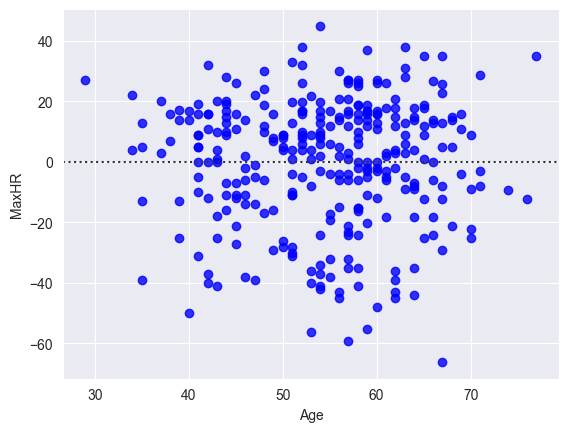

In [112]:

sns.residplot(x = 'Age', y = 'MaxHR', data = data, color = 'blue')
plt.show()

### Interpretation

The residual plot shows a simple linear regression line for age and maximum heart rate. The residuals (errors) are randomly scattered around the line, indicating that there is no systematic pattern in the residuals. This suggests that the regression model for age and maximum heart rate is a good fit for the data.

## Customized Residual Plot

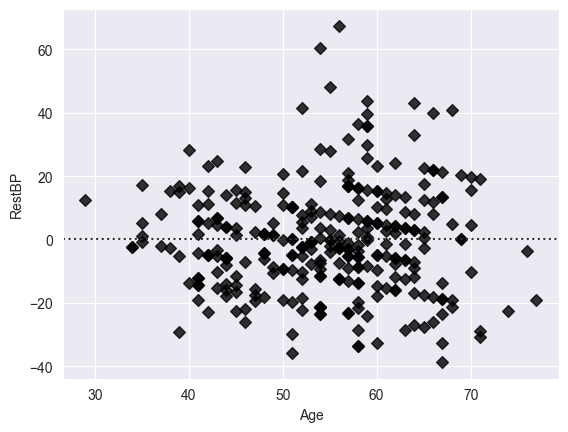

In [127]:

sns.residplot(x = 'Age', y = 'RestBP', data = data, color = 'green',scatter_kws=dict(marker = "D", color = "black"))
plt.show()

## 4. Histogram

#### What is Histogram  ?

A histogram is a graphical representation of the distribution of a continuous variable. It shows the number of data points that fall within each range of values. The shape of the histogram can vary depending on the distribution of the data.

### Parameters

- x : Input variable for the histogram.

- y : Optional input variable for the histogram. If provided, a 2D histogram is created.

- data : DataFrame containing the input variable(s).

- bins : Number of bins to use for the histogram.

- kde : If True, a kernel density estimate (KDE) is plotted along with the histogram.

- discrete : If True, treat the input variable as discrete.

- density : If True, the density estimate is plotted along with the histogram.

- kde_kws : Change the KDE style.

- element : Change style of the histogram

- cbar : Show the cbar




### Simple 1D histograms

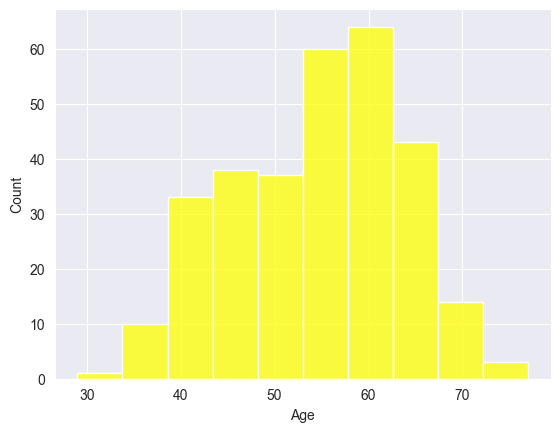

In [144]:
sns.histplot(data = data, x  = 'Age' ,bins=10,color='yellow')
plt.show()

### Interpretation

The histogram shows a 1D histogram of age with 10 bins. The distribution of age , with most data points falling between 50 and 70 years old.

### Customized 1D Histogram



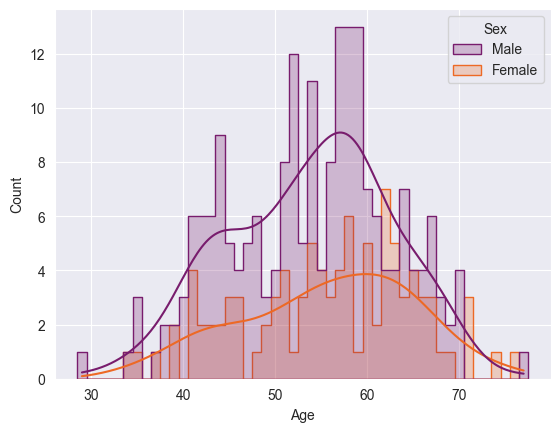

In [156]:
dataCopy = data.copy()
dataCopy['Sex'] = data['Sex'].replace({0:'Female',1:"Male"})
sns.histplot(data = dataCopy, x  = 'Age',hue = 'Sex' ,bins=10,kde= True,palette='inferno',discrete=True,element='step')
plt.show()

### Simple 2D histograms

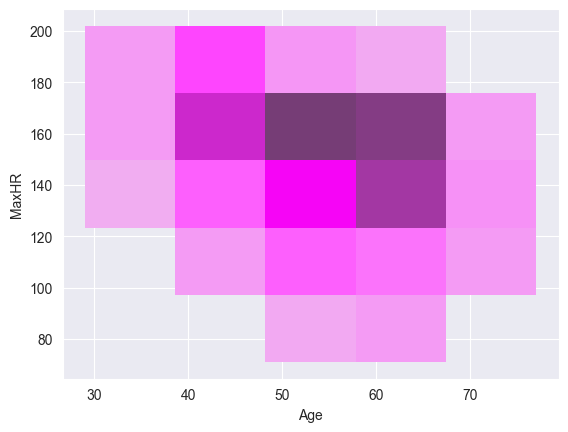

In [158]:
sns.histplot(data = data, x  = 'Age' , y = 'MaxHR',bins=5,color='purple')
plt.show()

### Customized 2D Histogram



C:\Users\Syed Abdullah\AppData\Local\Temp\ipykernel_18044\1808662464.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = dataCopy, x  = 'Age',y = 'MaxHR',bins=5,palette='viridis',cbar = True)


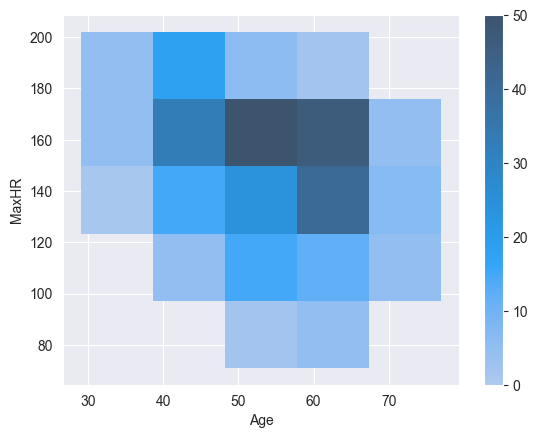

In [174]:
dataCopy = data.copy()
dataCopy['Sex'] = data['Sex'].replace({0:'Female',1:"Male"})
sns.histplot(data = dataCopy, x  = 'Age',y = 'MaxHR',bins=5,palette='viridis',cbar = True)
plt.show()

### Interpretation

The histogram shows a 2D histogram of age and maximum heart rate with 5 bins for each variable. The distribution of age and maximum heart rate, with most data points falling between 50 and 70 years old for age and between 140 and 200 for maximum heart rate. The histograms are separated by gender.


## 5. Kernel Density Estimate (KDE) Plot

#### What is the Kernel Density Estimate Plot ? 

A kernel density estimate (KDE) plot is a smoothed version of a histogram. It shows the distribution of a continuous variable by placing a kernel function at each data point and summing them to obtain a smooth curve. The kernel function determines the shape of the curve and the bandwidth (width) of the smoothing.

### Parameters

- x : Input variable for the KDE plot.

- y : Optional input variable for the KDE plot. If provided, a 2D KDE plot is created.

- data : DataFrame containing the input variable(s).

- cbar : Show cbar for the KDE plot

- weights : Weights for each data point. If not provided, all data points are assumed to have equal weight.

- fill : If True, fill the area under the curve with color.

- hue : Input variable for the color encoding of the plot.

- palette : Color palette to use for the plot.

- multiple : Method for drawing multiple elements when semantic mapping creates subsets. Only relevant with univariate data.



### Simple KDE Plot

<Axes: xlabel='MaxHR', ylabel='Chol'>

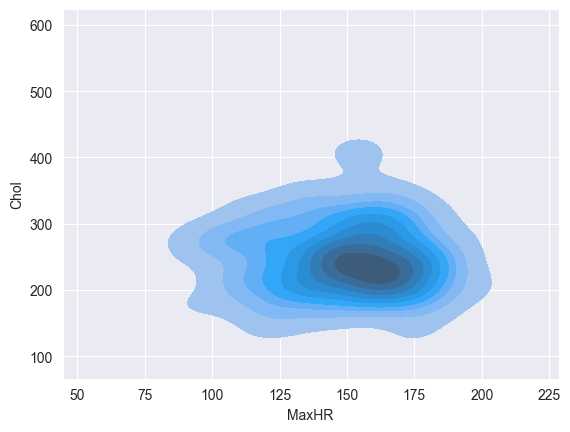

In [178]:
sns.kdeplot(data = data , x = 'MaxHR', y = 'Chol',fill= True)

### Interpretation

The KDE plot shows a 2D KDE plot of maximum heart rate and cholesterol. The distribution of maximum heart rate and cholesterol is smoothed using a Gaussian kernel. 

### Customized Simple KDE Plot

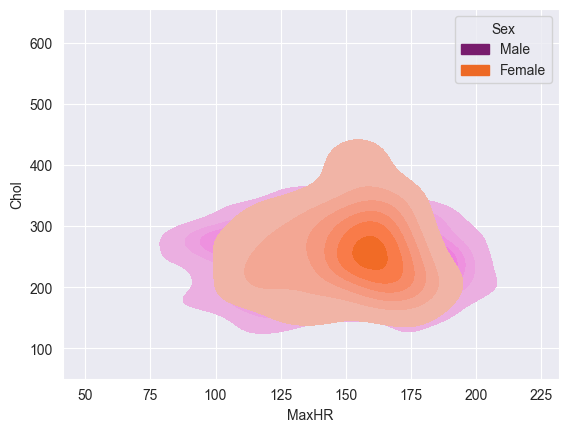

In [187]:
dataCopy = data.copy()
dataCopy['Sex'] = data['Sex'].replace({0:'Female',1:"Male"})
sns.kdeplot(data = dataCopy , x = 'MaxHR', y = 'Chol', hue = 'Sex', fill= True, palette='inferno',multiple= "fill")
plt.show()

### Interpretation

The KDE plot shows a 2D KDE plot of maximum heart rate and cholesterol, separated by gender. 

## 6. Distribution Plot 

#### What is distribution plot ? 

A distribution plot shows the distribution of a continuous variable. It can be used to visualize the shape, center, and spread of the data. 


### Parameters

- x : Input variable for the distribution plot.

- y : Optional input variable for the distribution plot. If provided, a 2D distribution plot is created.

- data : DataFrame containing the input variable(s).

- hue : Input variable for the color encoding of the plot.

- palette : Color palette to use for the plot.

- kde : If True, add a kernel density estimate (KDE) curve to the plot.


- kde_kws : Change the KDE style.

- hist_kws : Change the histogram style.



### Simple Distribution Plot

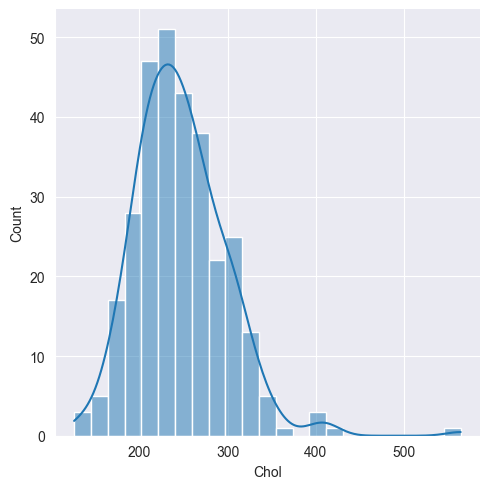

In [193]:
sns.displot(data = data, x = 'Chol',kde = 'True')
plt.show()

### Interpretation

The distribution plot shows a 1D distribution of cholesterol. The data points are smoothed using a Gaussian kernel to create a smooth curve. 

### Customized Distribution Plot

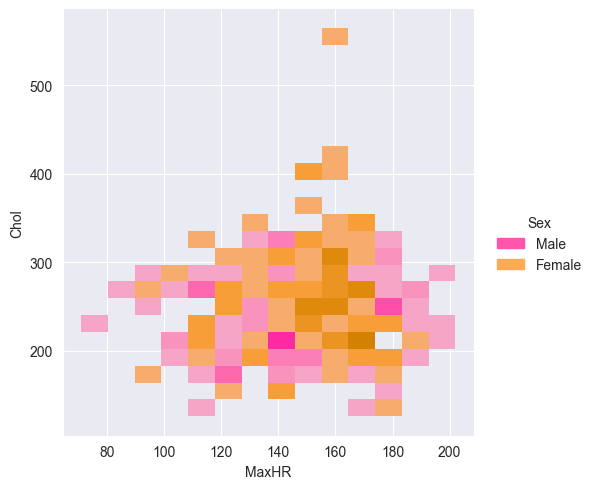

In [200]:
dataCopy = data.copy()
dataCopy['Sex'] = data['Sex'].replace({0:'Female',1:"Male"})
sns.displot(data = dataCopy , x = 'MaxHR', y = 'Chol', hue = 'Sex', palette='spring' , kind = 'hist')
plt.show()

### Interpretation

The distribution plot shows a 2D distribution of maximum heart rate and cholesterol, separated by gender. T

## 7. Box Plot 


#### What is box plot ?

A box plot is a graphical representation of the distribution of a continuous variable. It shows the minimum, first quartile (Q1), median, third quartile (Q3), and maximum values. It also displays outliers.

### Parameters

- x : Input variable for the box plot.

- y : Optional input variable for the box plot. If provided, a 2D box plot is created.

- data : DataFrame containing the input variable(s).

- hue : Input variable for the color encoding of the plot.

- palette : Color palette to use for the plot.

- linewidth : Width of the lines that frame the plot elements.

- fliersize : Size of the markers used to indicate outlier observations.


### Simple Box Plot

<Axes: ylabel='MaxHR'>

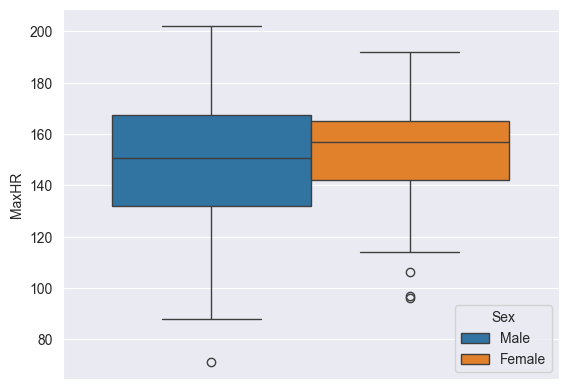

In [209]:
dataCopy = data.copy()
dataCopy['Sex'] = data['Sex'].replace({0:'Female',1:"Male"})
sns.boxplot(data = dataCopy , y = "MaxHR" , hue = 'Sex')

### Interpretation

The box plot shows a 1D box plot of maximum heart rate, separated by gender. The median and interquartile range (IQR) for each gender are shown. The outliers are marked with a marker.

### Customized Box Plot

<Axes: ylabel='MaxHR'>

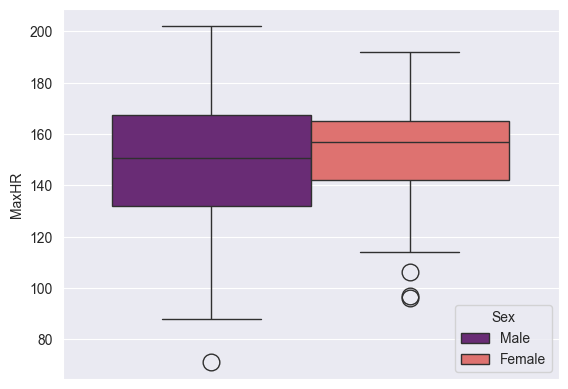

In [210]:
dataCopy = data.copy()
dataCopy['Sex'] = data['Sex'].replace({0:'Female',1:"Male"})
sns.boxplot(data = dataCopy , y = "MaxHR" , hue = 'Sex',palette='magma',fliersize=12)
plt.show()

## 8. Violin Plot 


#### What is Violin Plot

A violin plot is a combination of a box plot and a kernel density estimate (KDE). It shows the distribution of a continuous variable and its probability density function. It is useful for comparing distributions and identifying outliers.

### Parameters

- x : Input variable for the violin plot.

- y : Optional input variable for the violin plot. If provided, a 2D violin plot is created.

- data : DataFrame containing the input variable(s).

- hue : Input variable for the color encoding of the plot.

- palette : Color palette to use for the plot.

- split : If True, draw a split violin for each hue level.

- inner : Style of the inner box plot of the violin.{“box”, “quart”, “point”, “stick”, None}

- scale : Scale of the violin plot.





### Simple Violen Plot

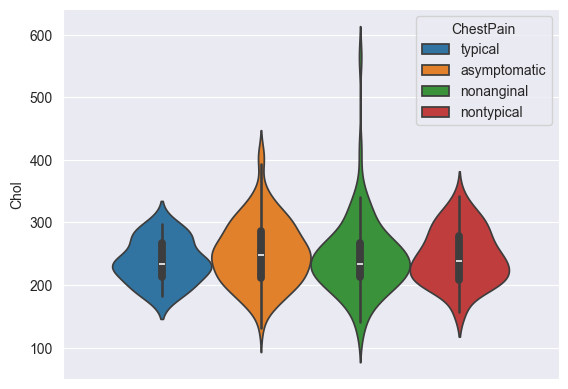

In [220]:
sns.violinplot(data= data,y='Chol',hue = 'ChestPain')
plt.show()

### Interpretation


The violin plot shows a 1D violin plot of cholesterol, separated by chest pain type. 




### Customized Violen Plot

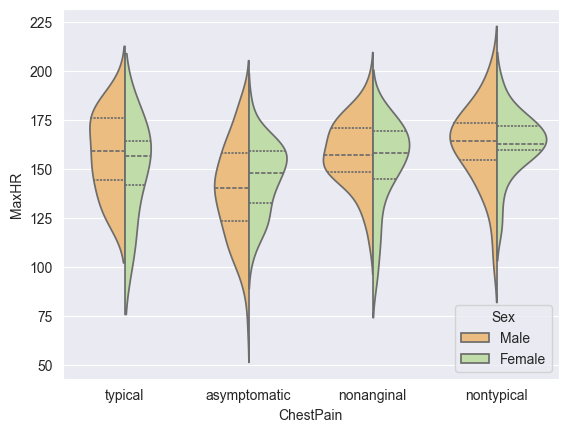

In [232]:
dataCopy = data.copy()
dataCopy['Sex'] = data['Sex'].replace({0:'Female',1:"Male"})
sns.violinplot(data= dataCopy,x='ChestPain',y='MaxHR',hue = 'Sex',palette='Spectral',split=True,inner='quart')
plt.show()

### Interpretation

The violin plot shows a 2D violin plot of maximum heart rate and chest pain type, separated by gender. The violins are split by chest pain type and the inner quartiles are shown.

## 9. Pair Plot


#### What is Pair Plot ? 

A pair plot is a grid of scatter plots for each pair of variables in a dataset. It helps visualize the relationships between variables and identify patterns.

### Parameters

- data : DataFrame containing the input variables.

- hue : Input variable for the color encoding of the plot.

- palette : Color palette to use for the plot.


- kind : Type of plot to use for each pair of variables. {“scatter”, “reg”, “kde”, “hex”}

- diag_kind : Type of plot to use for the diagonal subplots. {“hist”, “kde”, None}

- markers : Markers to use for each pair of variables.


### Simple Pair Plot

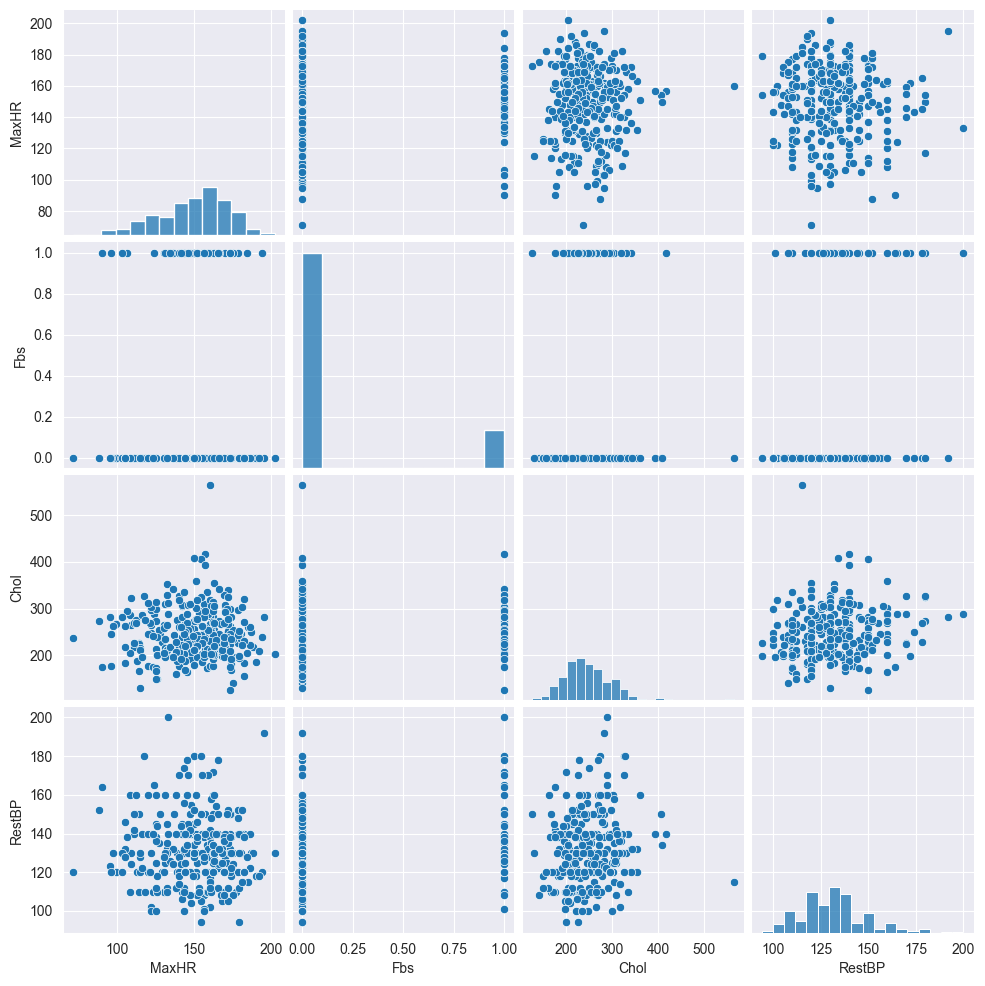

In [238]:
selectedData = data[['MaxHR','Fbs',"Chol","Thal","RestBP"]]

sns.pairplot(data= selectedData)
plt.show()

### Interpretation 

The pair plot shows a grid of scatter plots for each pair of variables in the selected dataset. The diagonal subplots show histograms for each variable. The scatter plots show the relationship between variables.

### Customized Pair Plot

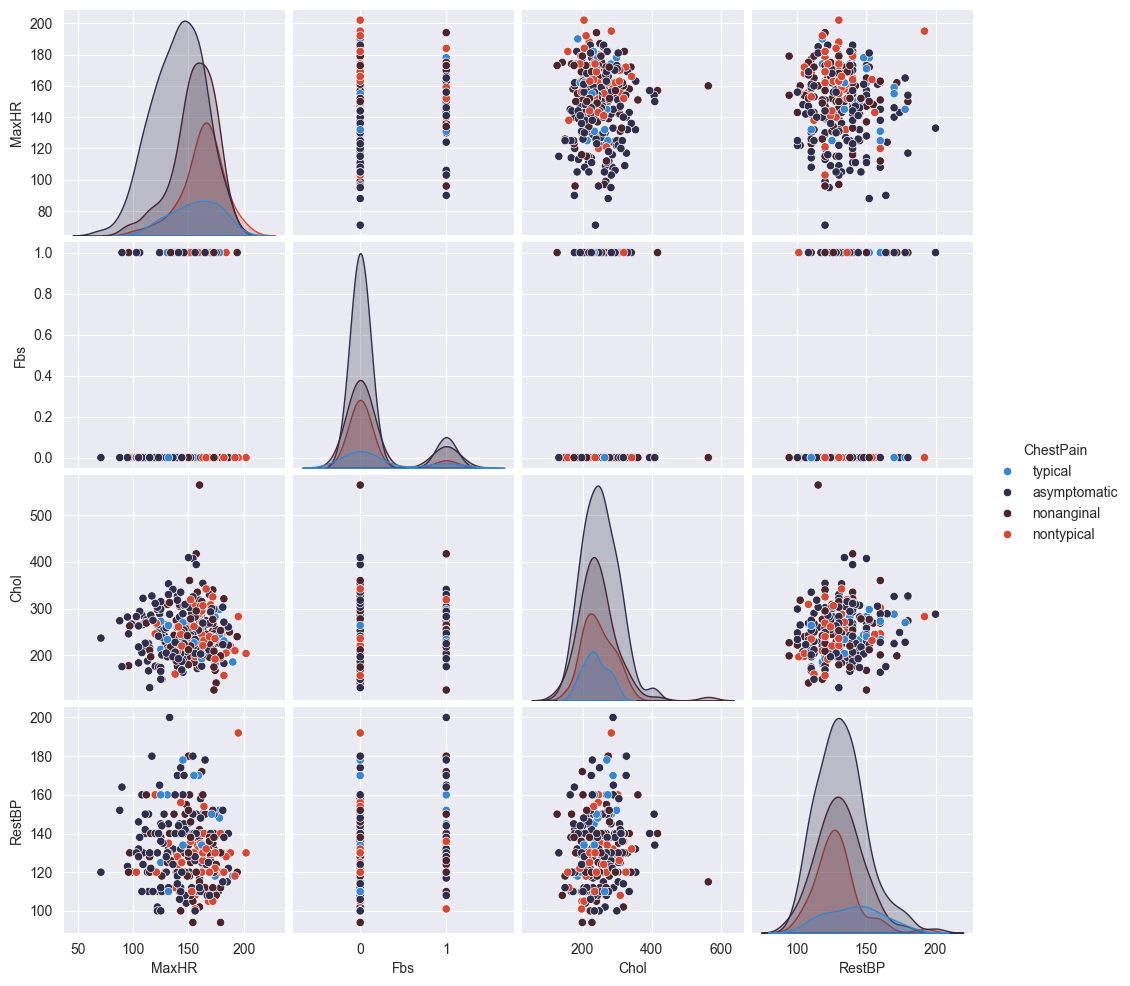

In [242]:
selectedData = data[['MaxHR','Fbs',"Chol","Thal","RestBP","ChestPain"]]

sns.pairplot(data= selectedData , hue = "ChestPain",palette='icefire',kind = "scatter",diag_kind='auto')
plt.show()

### Interpretation

The pair plot shows a grid of scatter plots for each pair of variables in the selected dataset, separated by chest pain type. The diagonal subplots show KDE for each variable. The scatter plots show the relationship between variables, highlighting the relationship between chest pain type and other variables.

## 10 Heat Map

#### What is heatmap ?

A heatmap is a graphical representation of data where the individual values in a matrix are represented as colors. It is used to visualize the relationship between two variables and their potential correlation.

### Parameters

- data - 2D array-like or pandas DataFrame, containing the data to be plotted

- cmap - Changings the heatmap color 

- vmin - minimum value of the heatmap color

- vmax - maximum value of the heatmap color

- annot - Whether to annotate the heatmap with the values

- fmt - formatting string for annot

- linewidth - linewidth of the heatmap

- linecolor - linecolor of the heatmap





### Simple Example

In [244]:
chestPainCount = data.groupby('Sex')['ChestPain'].value_counts().unstack()

### Plotting

<Axes: xlabel='ChestPain', ylabel='Sex'>

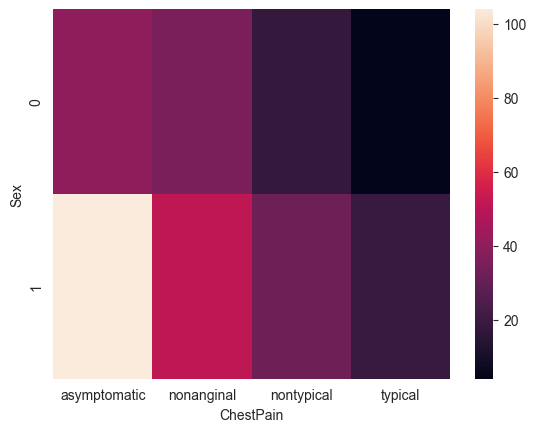

In [245]:
sns.heatmap(data=chestPainCount)

### Interpretation

The heatmap shows the count of chest pain type for each gender. The darker the color, the higher the count. 


### Correlation Example

<Axes: >

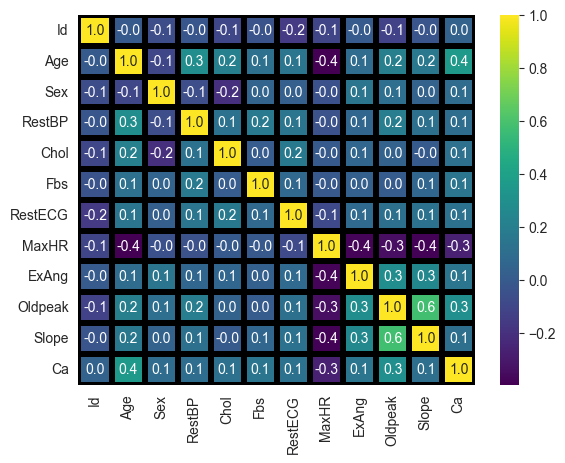

In [246]:
### Seperating Numeric Data

numericData = data.select_dtypes ('number')

sns.heatmap(data=numericData.corr() , cmap = 'viridis', annot= True , fmt = '.1f' , linewidths= 3 , linecolor= 'black')

### Interpretation

The heatmap shows the correlation matrix between numeric variables. The darker the color, the stronger the correlation. For example, the maximum heart rate and age have a strong negative correlation, indicating that as one increases, the other also decreases.


## 11. Joint Plot 


#### What is joint plot ?

A joint plot combines a scatter plot with histograms for each variable in a dataset. It helps visualize the relationship between variables and identify patterns.

### Parameters

- x : Input variable for the scatter plot.

- y : Input variable for the scatter plot.

- data : DataFrame containing the input variables.

- hue : Input variable for the color encoding of the plot.

- palette : Color palette to use for the plot.

- kind : Type of plot to use for the scatter plot. {“scatter”, “reg”, “kde”, “hex”}

- joint_kws : Additional keyword arguments for the scatter plot.

- marginal_kws : Additional keyword arguments for the marginal histogram plots.




### Simple Joint Plot

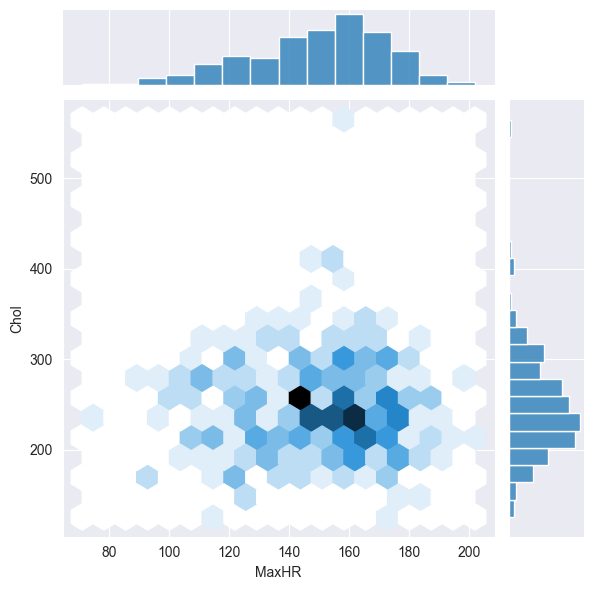

In [248]:


sns.jointplot(data= data, x='MaxHR', y='Chol', kind='hex',)

### Customized Joint Plot



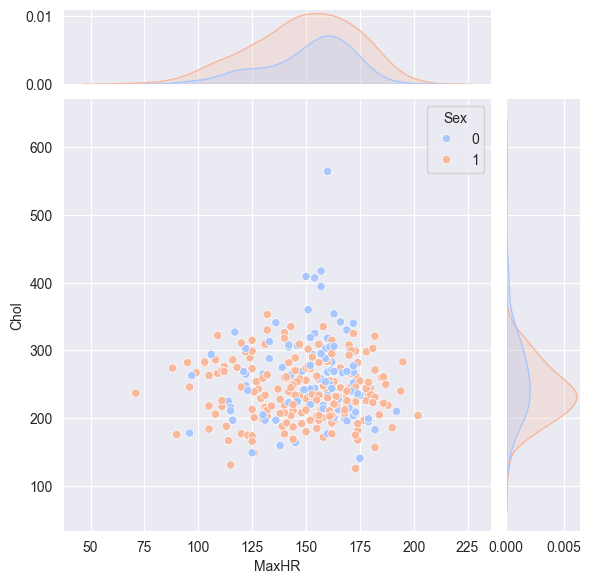

In [257]:
sns.jointplot(data= data, x='MaxHR', y='Chol', kind='scatter', hue='Sex', palette='coolwarm',marginal_ticks=True)

### Interpretation

The joint plot shows a scatter plot of maximum heart rate and cholesterol, separated by gender. 

## 12. Facet Grid 

#### What is Facet Grid ? 

A FacetGrid is a grid of small multiples that can be used to visualize different variables in a dataset. It allows for more flexibility in visualizing complex relationships.

### Parameters

- col : Column name for grouping data into different facets.

- row : Row name for grouping data into different facets.

- hue : Input variable for the color encoding of the plot.

- palette : Color palette to use for the plot.

- col_wrap : Maximum number of columns in the grid.

- sharex : Whether to share the x-axis across facets.

- sharey : Whether to share the y-axis across facets.





### Faceit Grid 

<Figure size 1200x1200 with 0 Axes>

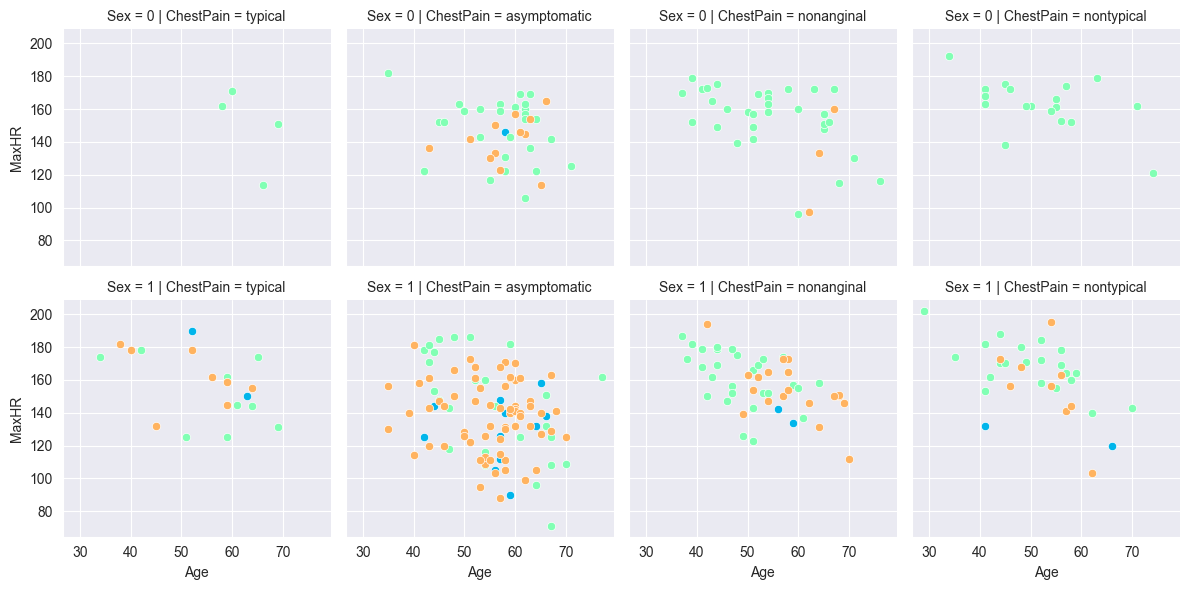

In [277]:
plt.figure(figsize=(12,12))
g = sns.FacetGrid(data, col='ChestPain',row = "Sex",hue="Thal",palette="rainbow")
g.map(sns.scatterplot, 'Age','MaxHR')
plt.show()




### Interpretation

The FacetGrid shows scatter plots of maximum heart rate and age, separated by chest pain type and gender, with different colors representing different types of thalium stress result. The grid is organized by chest pain type and gender.